Whitney Kenner
UID: u0777962
5/31/23
CS6017
HW2

PART 1:

Null hypothesis:
A == B

the null hypothesis we want to disprove is that they are statistically the same....

In [2]:
import math
#computing the Z value
p1 = 500/1000
p2 = 550/1000
p = (500 +550)/ (1000 + 1000)
n1 = 1000
n2 = 1000

zVal = (p1 - p2)/math.sqrt(p*(1-p)*(1/n1 + 1/n2))
print(zVal)

-2.238868314198227


In [3]:
#associated P value
import scipy.stats as sc
pVal = sc.norm.cdf(zVal)*100
print(pVal)

1.2582242850159198


What can you conclude?
with a 1% significance level, we cannot make any conclusions about our null hypothesis
with a 5% significance level, we can disregard our null hypothesis since the p value is 1.25% or 0.0125, we can conclude that they are statistically not the same!!

PART 2:

Task 1:

In [4]:
#import the csv files
import pandas as pd
realEstate1 = pd.read_csv('realEstate1.csv')
realEstate2 = pd.read_csv('realEstate2.csv')
frames = [realEstate1, realEstate2]
realEstate = pd.concat(frames)
realEstate


,ListNo,Access,AdditInfo,Acres,ListAgt,AirType,Amenities,Area,BackDim,Basemnt,...,WinEvp1,WinEvp2,WinEvp3,WinEvp4,Window,WithDrDt,YearBlt,Zip,Zoning,LastMod
0,1397571,Concrete,NaN,0.29,Liz Slager,Central Air; Electric,See Remarks; Cable Tv Available; Cable Tv Wire...,101,0.0,Daylight; Entrance; Full; Walkout,...,0,0,0,0,Blinds,00/00/0000,1998,84103,NaN,08/29/2016
1,1394021,Asphalt,NaN,0.01,Angela Carlson,Central Air; Electric,Cable Tv Available; Electric Dryer Hookup,101,0.0,None/Crawl Space,...,0,0,0,0,Blinds; Plantation Shutters,00/00/0000,1965,84103,RES,08/22/2016
2,1393604,NaN,NaN,0.11,Rachel Kitterer,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup,101,0.0,Full,...,0,0,0,0,Blinds; Plantation Shutters,00/00/0000,1940,84103,NaN,08/29/2016
3,1393602,Concrete,NaN,0.14,Rachel Kitterer,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup,101,0.0,Full,...,0,0,0,0,Blinds,00/00/0000,1940,84103,NaN,08/29/2016
4,1393829,Asphalt,NaN,0.01,T. Carter Maudsley,Central Air; Electric,Cable Tv Wired,101,0.0,None/Crawl Space,...,0,0,0,0,NaN,00/00/0000,1969,84103,NaN,08/18/2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,1277128,Concrete,NaN,0.28,Liz Slager,Central Air; Electric,Cable Tv Wired; Electric Dryer Hookup; Exercis...,101,0.0,Partial; Walkout,...,0,0,0,0,Blinds; Full,00/00/0000,1978,84103,RES,10/06/2015
144,1265274,Concrete,NaN,0.01,PATRICK WISCOMBE,Central Air; Electric,Electric Dryer Hookup; Exercise Room; Gas Drye...,101,0.0,None/Crawl Space,...,0,0,0,0,Full; Shades,00/00/0000,1979,84103,NaN,05/24/2016
145,1241781,Concrete,NaN,0.00,Jacqui Johnston,Central Air; Electric,Exercise Room; Swimming Pool,101,0.0,None/Crawl Space,...,0,0,0,0,Draperies,00/00/0000,1976,84103,CONDO,10/29/2015
146,1238399,NaN,NaN,0.07,Grady Kohler,Central Air; Electric,Cable Tv Available; Electric Dryer Hookup,101,0.0,None/Crawl Space,...,0,0,0,0,NaN,00/00/0000,1886,84103,NaN,09/11/2015


Task 2: clean the data

In [5]:
#Only keep houses with List Price between 200,000 and 1,000,000 dollars
realEstate = realEstate.loc[realEstate['LstPrice'] <= 1000000]
realEstate = realEstate.loc[realEstate['LstPrice'] >= 200000]

#Remove columns that you don't think contribute to the value of the house
realEstate = realEstate.filter(items=['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'PropType', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt'])
realEstate


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt
0,0.29,1,3,40.779524,-111.893542,725000,1,0,Single Family,752000,7244,4.0,5.0,"5,415",1998
1,0.01,0,0,40.773243,-111.883291,205000,0,0,Condo,205000,1431,2.0,1.0,924,1965
2,0.11,0,0,40.773972,-111.867470,390000,1,0,Single Family,390000,1816,3.0,1.0,"1,702",1940
3,0.14,0,1,40.783009,-111.872100,445000,1,3,Single Family,443000,3260,3.0,2.0,"1,756",1940
5,0.01,0,2,40.771693,-111.886951,339000,0,2,Condo,334000,2141,3.0,2.0,"1,368",1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.28,1,3,40.782933,-111.851143,995000,0,6,Single Family,949000,6658,6.0,4.0,"5,740",1978
144,0.01,0,2,40.770904,-111.886201,349999,2,2,Condo,340000,1877,2.0,2.0,"1,473",1979
145,0.00,0,0,40.773843,-111.891911,249900,0,0,Condo,231000,2812,2.0,2.0,"1,385",1976
146,0.07,0,1,40.772835,-111.854867,330000,0,0,Single Family,310000,2079,5.0,3.0,"2,094",1886


In [6]:
#Convert 'TotSqf' to an integer.
realEstate['TotSqf']=realEstate['TotSqf'].str.replace(',','')
realEstate['TotSqf'] = realEstate['TotSqf'].astype(int)
realEstate


,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt
0,0.29,1,3,40.779524,-111.893542,725000,1,0,Single Family,752000,7244,4.0,5.0,5415,1998
1,0.01,0,0,40.773243,-111.883291,205000,0,0,Condo,205000,1431,2.0,1.0,924,1965
2,0.11,0,0,40.773972,-111.867470,390000,1,0,Single Family,390000,1816,3.0,1.0,1702,1940
3,0.14,0,1,40.783009,-111.872100,445000,1,3,Single Family,443000,3260,3.0,2.0,1756,1940
5,0.01,0,2,40.771693,-111.886951,339000,0,2,Condo,334000,2141,3.0,2.0,1368,1976
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.28,1,3,40.782933,-111.851143,995000,0,6,Single Family,949000,6658,6.0,4.0,5740,1978
144,0.01,0,2,40.770904,-111.886201,349999,2,2,Condo,340000,1877,2.0,2.0,1473,1979
145,0.00,0,0,40.773843,-111.891911,249900,0,0,Condo,231000,2812,2.0,2.0,1385,1976
146,0.07,0,1,40.772835,-111.854867,330000,0,0,Single Family,310000,2079,5.0,3.0,2094,1886


In [7]:
#Add a new column titled Prop_Type_SingleFamily that is set to 0 if the i-th listing is a condo or townhouse, or 1 if the i-th listing is a single family house.
realEstate['Prop_Type_SingleFamily'] = [1 if x == 'Single Family' else 0 for x in realEstate['PropType']]
realEstate

,Acres,Deck,GaragCap,Latitude,Longitude,LstPrice,Patio,PkgSpacs,PropType,SoldPrice,Taxes,TotBed,TotBth,TotSqf,YearBlt,Prop_Type_SingleFamily
0,0.29,1,3,40.779524,-111.893542,725000,1,0,Single Family,752000,7244,4.0,5.0,5415,1998,1
1,0.01,0,0,40.773243,-111.883291,205000,0,0,Condo,205000,1431,2.0,1.0,924,1965,0
2,0.11,0,0,40.773972,-111.867470,390000,1,0,Single Family,390000,1816,3.0,1.0,1702,1940,1
3,0.14,0,1,40.783009,-111.872100,445000,1,3,Single Family,443000,3260,3.0,2.0,1756,1940,1
5,0.01,0,2,40.771693,-111.886951,339000,0,2,Condo,334000,2141,3.0,2.0,1368,1976,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.28,1,3,40.782933,-111.851143,995000,0,6,Single Family,949000,6658,6.0,4.0,5740,1978,1
144,0.01,0,2,40.770904,-111.886201,349999,2,2,Condo,340000,1877,2.0,2.0,1473,1979,0
145,0.00,0,0,40.773843,-111.891911,249900,0,0,Condo,231000,2812,2.0,2.0,1385,1976,0
146,0.07,0,1,40.772835,-111.854867,330000,0,0,Single Family,310000,2079,5.0,3.0,2094,1886,1


In [8]:
#Remove the listings with erroneous 'Longitude' (one has Longitude = 0) and 'Taxes' values (two have unreasonably large values).
realEstate = realEstate.loc[(realEstate['Taxes'] < 10000)]
realEstate = realEstate.loc[(realEstate['Longitude'] != 0)]
#realEstate.sort_values(['Longitude'])
#realEstate.sort_values(['Taxes'])



Task 3: Exploratory Data Analysis

Explore the dataset. Write a short description of the dataset describing the number of items, the number of variables and check to see if the values are reasonable.

This dataset contains 260 rows (items) and 16 columns (variables) 

Unreasonable values:
Most values seem reasonable except:
- 1 house has 54 patios which seems absurd
- 1 person is spending $1 on taxes
- 1 house has 0 bathrooms which is presumably illegal

everything else seems quite reasonable and this data can be evaluated to look at correlations between these values and house price

<Axes: xlabel='PropType'>

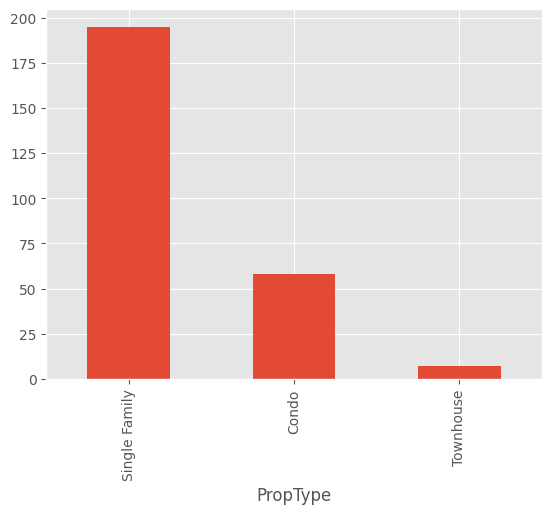

In [9]:
#Make a bar chart showing the breakdown of the different types of houses (single family, townhouse, condo).
import matplotlib.pyplot as plt
plt.style.use( 'ggplot' )
realEstate['PropType'].value_counts().plot(kind="bar")



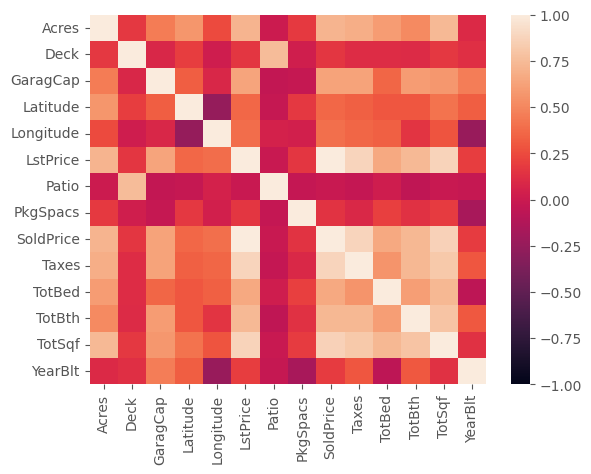

In [10]:
#Compute the correlation matrix and use a heat map to visualize the correlation coefficients.
#Use a diverging color scale from -1 to +1 (see vmin and vmax parameters for pcolorLinks to an external site.)
#Show a legend (colorbarLinks to an external site.)
#Make sure the proper labels are visible and readable (see xticksLinks to an external site. and the corresponding yticksLinks to an external site.).
import seaborn as sn
modifiedHMDF = realEstate.filter(items=['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt'])
corrHMDF = modifiedHMDF.corr()
realEstateHeatMap = sn.heatmap(corrHMDF, vmax=1, vmin=-1)

array([[<Axes: xlabel='Acres', ylabel='Acres'>,
        <Axes: xlabel='LstPrice', ylabel='Acres'>,
        <Axes: xlabel='SoldPrice', ylabel='Acres'>,
        <Axes: xlabel='Taxes', ylabel='Acres'>,
        <Axes: xlabel='TotBed', ylabel='Acres'>,
        <Axes: xlabel='TotBth', ylabel='Acres'>,
        <Axes: xlabel='TotSqf', ylabel='Acres'>,
        <Axes: xlabel='YearBlt', ylabel='Acres'>],
       [<Axes: xlabel='Acres', ylabel='LstPrice'>,
        <Axes: xlabel='LstPrice', ylabel='LstPrice'>,
        <Axes: xlabel='SoldPrice', ylabel='LstPrice'>,
        <Axes: xlabel='Taxes', ylabel='LstPrice'>,
        <Axes: xlabel='TotBed', ylabel='LstPrice'>,
        <Axes: xlabel='TotBth', ylabel='LstPrice'>,
        <Axes: xlabel='TotSqf', ylabel='LstPrice'>,
        <Axes: xlabel='YearBlt', ylabel='LstPrice'>],
       [<Axes: xlabel='Acres', ylabel='SoldPrice'>,
        <Axes: xlabel='LstPrice', ylabel='SoldPrice'>,
        <Axes: xlabel='SoldPrice', ylabel='SoldPrice'>,
        <Axes: xlab

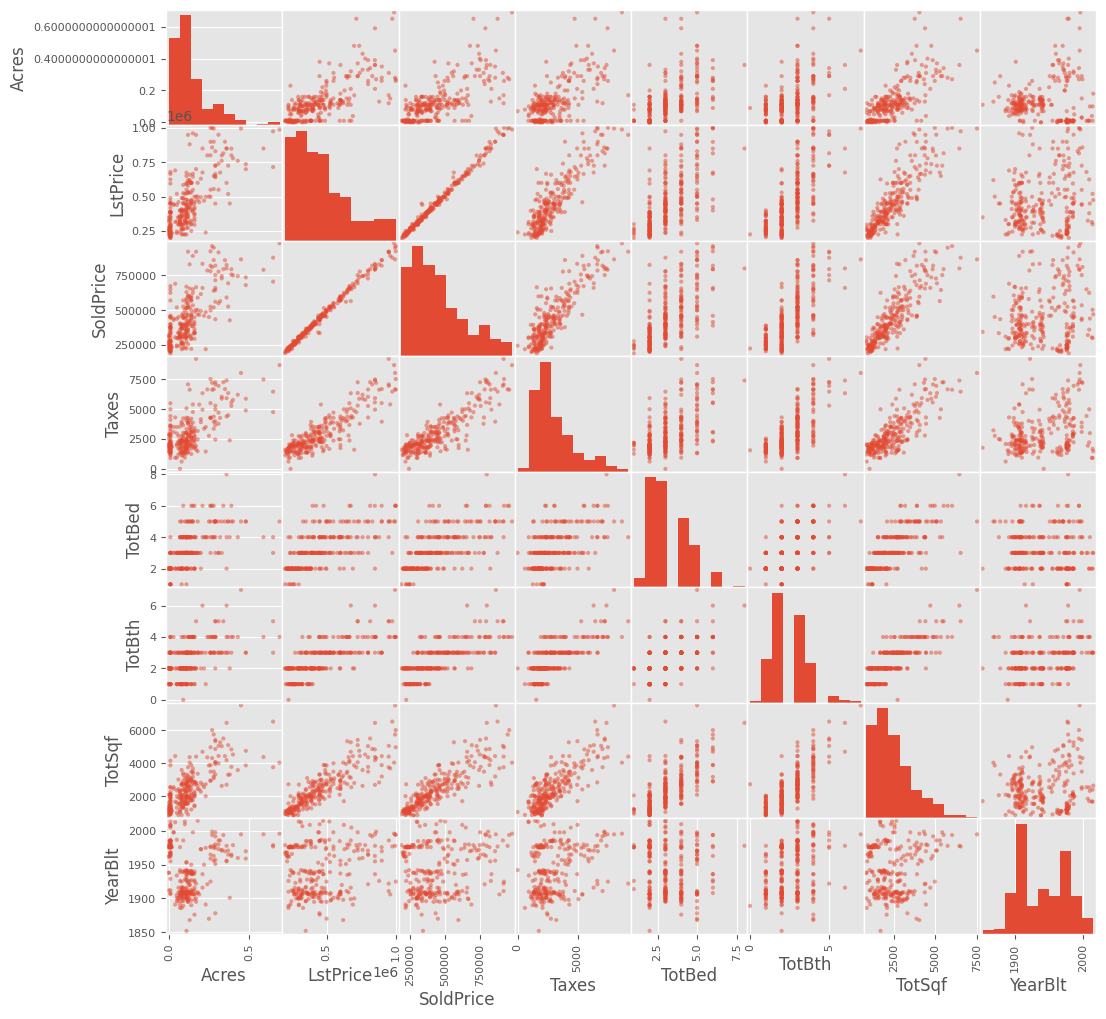

In [11]:
#Make a scatter plot matrix to visualize the correlations. Determine which columns have strong correlations.
scatterREDF = realEstate.filter(items=['Acres', 'LstPrice', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt'])
pd.plotting.scatter_matrix(scatterREDF, figsize=(12,12))

The columns with strong correlation are: 
sold price and lst price, which intuitively makes sense that the sale price would be close to the listed price. This has the strongest correlation, but some weaker ones (but still positively correlated) are:
Total square feet and taxes
list price and total square feet
sold price and total square feet

these are somewhere between a moderate and strong correlation. A strong correlation is generally around an r of 0.7, which is what I would predict the last strong relationships are

outside of the relationships listed above, there seems to be little to no correlation between the various variables of a house

year built, in particular, seems to be the weakest indicater of anything at all as there is no correlation between it and anything else

Task 4: Geospatial Plot

Two of the variables are the latitude and longitude of each listing. Salt Lake City is on this nice east-west, north south grid, so even a simple plot of latitude vs longitude makes sense. Create a scatterplot of these two variables. Use color to indicate the price of the house. How does the price depend on the house location?

Bonus: If you can, overlay the scatterplot on a map of the city. (This is challenging, and we didn't teach you how to do it, so you should do the other parts of the assignment first.)

What can you say about the relation between the location and the house price?

/var/folders/7y/nmsbr9zs5dd6wm4vy33skx600000gn/T/ipykernel_65411/3797091847.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  cbar.ax.set_yticklabels(['200,000', '300,000','400,000','500,000', '600,000','700,000', '800,000','900,000', '1,000,000'])


Text(0, 0.5, 'Longitude')

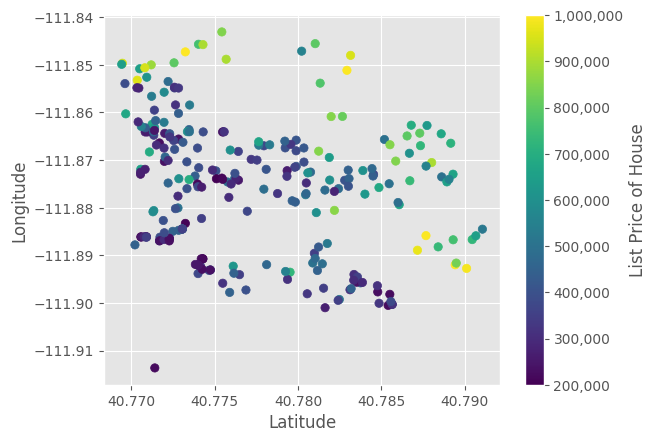

In [12]:
#plot the latitude vs longitude on a scatterplot (use color to indicate the price of the house) How does the price of the house depend on location?
import numpy as np
locationDF = realEstate.filter(items=['Latitude', 'Longitude', 'LstPrice'])


locationScatterPlot = plt.scatter(x=locationDF['Latitude'], y=locationDF['Longitude'], c=locationDF['LstPrice'])
cbar = plt.colorbar(locationScatterPlot)
cbar.ax.set_yticklabels(['200,000', '300,000','400,000','500,000', '600,000','700,000', '800,000','900,000', '1,000,000'])
cbar.set_label("List Price of House")
plt.xlabel("Latitude")
plt.ylabel("Longitude")




How does the price depend on the house location?
the farther east and north you go, (within this collection of locations), the price generally increases.

What can you say about the relation between the location and the house price?
Most of the houses range between 200k and 700k, but as you get farther and farther east and north, the most expensive houses (between 700k and 1 million), are found on the outer edges. It would seem in the more central areas, location is not a very important facter for price, but for the eastern and northern houses, the location is correlated with higher house price!

Task 5: Simple Linear Regression

In [13]:
import statsmodels.formula.api as sm
#sold price vs taxes ols
sold_taxes_ols = sm.ols(formula="SoldPrice ~ Taxes", data=realEstate).fit()
sold_taxes_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     864.2
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           2.46e-84
Time:                        12:55:24   Log-Likelihood:                -3337.6
No. Observations:                 260   AIC:                             6679.
Df Residuals:                     258   BIC:                             6686.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.507e+05   1.17e+04     12.914      0.000    1.28e+05    1.74e+05
Taxes         99.0305      3.369     29.397      0.000      92.397     105.664
==============================================================================
Omnibus:                       38.290   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               54.583
Skew:                           0.917   Prob(JB):                     1.40e-12
Kurtosis:                       4.295   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
#sold price vs acres ols
sold_acres_ols = sm.ols(formula="SoldPrice ~ Acres", data=realEstate).fit()
sold_acres_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.505
Method:                 Least Squares   F-statistic:                     265.2
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.71e-41
Time:                        12:55:24   Log-Likelihood:                -3436.8
No. Observations:                 260   AIC:                             6878.
Df Residuals:                     258   BIC:                             6885.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3.079e+05   1.21e+04     25.508      0.000    2.84e+05    3.32e+05
Acres       1.093e+06   6.71e+04     16.285      0.000    9.61e+05    1.23e+06
==============================================================================
Omnibus:                       35.112   Durbin-Watson:                   2.116
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               47.307
Skew:                           0.886   Prob(JB):                     5.34e-11
Kurtosis:                       4.107   Cond. No.                         8.24
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#list price vs sold price ols
sold_list_ols = sm.ols(formula="SoldPrice ~ LstPrice", data=realEstate).fit()
sold_list_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.990
Model:                            OLS   Adj. R-squared:                  0.990
Method:                 Least Squares   F-statistic:                 2.611e+04
Date:                Tue, 06 Jun 2023   Prob (F-statistic):          2.97e-261
Time:                        12:55:24   Log-Likelihood:                -2927.2
No. Observations:                 260   AIC:                             5858.
Df Residuals:                     258   BIC:                             5866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.317e+04   2948.953      4.465      0.000    7361.378     1.9e+04
LstPrice       0.9441      0.006    161.593      0.000       0.933       0.956
==============================================================================
Omnibus:                      123.259   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              881.446
Skew:                          -1.750   Prob(JB):                    3.95e-192
Kurtosis:                      11.313   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

You'll find that the best predictor of sold price is the list price. Report the R-squared value for this model (SoldPrice ~ LstPrice) and give an interpretation for its meaning. 

The R-squared value for (SoldPrice ~ LstPrice) is 0.990, which is a very good R-squared value. This model explains 99% of the variablility in SldPrice! The closer an R-squared value is to 1, the greater the data is correlated, so this value indicates there is an extremely strong correlation between sale and list price.


Also give an interpretation of beta_1 for this model.

Beta_1 is the slope of the line, and in this case that's 1.0488, which means that as the listed price goes up, the sale price also goes up slightly more than 1. This will be reflected in the graph below. This slope indicates that the sale price on average increases linearly with the list price!


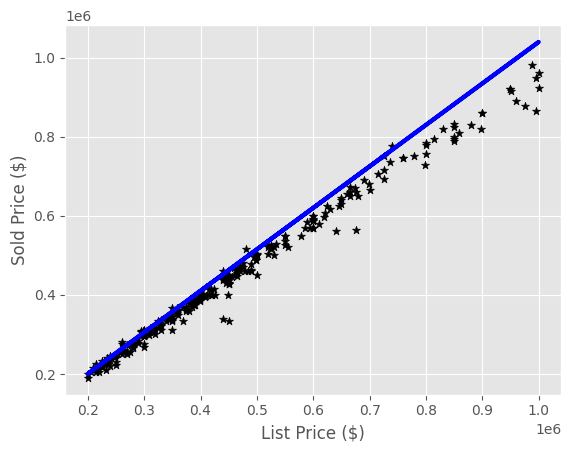

In [16]:
# Make a plot of list price vs. sold price and overlay the prediction coming from your regression model.
plt.scatter(x=realEstate['LstPrice'], y=realEstate['SoldPrice'], c='k', marker="*", label='LstPrice')
m= 1.0488
b= -9277.1587
plt.plot(realEstate['LstPrice'], m*realEstate['LstPrice'] + b, color="blue", linewidth=3)
_ =plt.xlabel("List Price ($)")
_ =plt.ylabel("Sold Price ($)")

Task 6: Multilinear Regression

In [17]:
#Develop a multilinear regression model for house prices in this neighborhood.
real_estate_all_ols = sm.ols(formula="SoldPrice ~ Acres + Deck + GaragCap + Latitude + Longitude + Patio + PkgSpacs + Taxes + TotBed + TotBth + TotSqf + YearBlt", data=realEstate).fit()
real_estate_all_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     119.6
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           1.50e-95
Time:                        12:55:24   Log-Likelihood:                -3279.3
No. Observations:                 260   AIC:                             6585.
Df Residuals:                     247   BIC:                             6631.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.075e+08   5.25e+07      2.049      0.041    4.18e+06    2.11e+08
Acres       7.195e+04   6.75e+04      1.066      0.288    -6.1e+04    2.05e+05
Deck        6760.7757   6136.619      1.102      0.272   -5326.000    1.88e+04
GaragCap    2.381e+04   6878.233      3.461      0.001    1.03e+04    3.74e+04
Latitude    1.528e+06   1.18e+06      1.296      0.196   -7.94e+05    3.85e+06
Longitude   1.513e+06   4.31e+05      3.515      0.001    6.65e+05    2.36e+06
Patio      -1251.5942   2195.345     -0.570      0.569   -5575.577    3072.389
PkgSpacs    1463.8933   3122.277      0.469      0.640   -4685.790    7613.576
Taxes         49.3698      5.803      8.507      0.000      37.940      60.800
TotBed      9450.5147   5935.340      1.592      0.113   -2239.819    2.11e+04
TotBth      6784.3819   8097.099      0.838      0.403   -9163.784    2.27e+04
TotSqf        41.4077      9.713      4.263      0.000      22.277      60.538
YearBlt     -210.9831    173.981     -1.213      0.226    -553.659     131.693
==============================================================================
Omnibus:                       21.908   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.316
Skew:                           0.526   Prob(JB):                     3.53e-08
Kurtosis:                       4.435   Cond. No.                     5.37e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Which variables are the best predictors for the Sold Price?

The best predictors for the sold price are: Taxes and TotSqf. There are other values with high coefficients but also high p values which indicate the model between that variable and sold price are not significant

Specific questions:

- Often the price per square foot for a house is advertised. Is this what the coefficient for TotSqf is measuring? Provide an interpretation for the coefficient for TotSqf.

The coefficient for TotSqf is the slope of the line for how sold price increases based on total square feet increasing. In this example, the average house price across this set will increase by 41.40 for every 1 ft squared increase in size in the house

- Estimate the value that each Garage space adds to a house.

$23,810. BUT the correlation between SalePrice and GaragCap is only 63%, so this is not a particularly strong correlation, so this is a rough estimate based on moderatley correlated values

- Does latitude or longitude have an impact on house price? Explain.

latitude does not. It has an extremely high p-value, so it can not be considered stastically significant. 
Longitude has a p value of 0.001 which is considered statistically significant but there is only a correlation of 39% which is very weak

- If we wanted to start a 'house flipping' company, we'd have to be able to do a better job of predicting the sold price than the list price does. How does your model compare?

It's not great, our R-squared value is quite a bit worse and many of these variables have weak or no correlation, we would definitely want a better model if we wanted our company to be succesful 

In [18]:
realEstateCoefficients = realEstate.filter(items=['Acres', 'Deck', 'GaragCap', 'Latitude', 'Longitude', 'LstPrice', 'Patio', 'PkgSpacs', 'SoldPrice', 'Taxes', 'TotBed', 'TotBth', 'TotSqf', 'YearBlt'])
print(realEstateCoefficients.corr())

              Acres      Deck  GaragCap  Latitude  Longitude  LstPrice   
Acres      1.000000  0.166535  0.452265  0.565715   0.242940  0.718336  \
Deck       0.166535  1.000000  0.080732  0.188524   0.016205  0.161625   
GaragCap   0.452265  0.080732  1.000000  0.321907   0.084631  0.635873   
Latitude   0.565715  0.188524  0.321907  1.000000  -0.252189  0.362788   
Longitude  0.242940  0.016205  0.084631 -0.252189   1.000000  0.388738   
LstPrice   0.718336  0.161625  0.635873  0.362788   0.388738  1.000000   
Patio      0.007261  0.751281 -0.046058 -0.027318   0.049541 -0.012415   
PkgSpacs   0.176664  0.030615 -0.024399  0.171773   0.038139  0.157512   
SoldPrice  0.711958  0.158344  0.626637  0.366947   0.390691  0.995096   
Taxes      0.680737  0.115316  0.629935  0.334774   0.358819  0.882305   
TotBed     0.594395  0.116709  0.358216  0.289318   0.329295  0.661516   
TotBth     0.508805  0.105799  0.599209  0.295843   0.151271  0.738907   
TotSqf     0.740974  0.171394  0.57326

Task 7: Incorporating a Categorical Variable

In [19]:
#sold price vs proptype
sold_prop_ols = sm.ols(formula="SoldPrice ~ Prop_Type_SingleFamily", data=realEstate).fit()
sold_prop_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.153
Method:                 Least Squares   F-statistic:                     47.67
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           3.90e-11
Time:                        12:55:24   Log-Likelihood:                -3506.7
No. Observations:                 260   AIC:                             7017.
Df Residuals:                     258   BIC:                             7025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                3.21e+05   2.17e+04     14.790      0.000    2.78e+05    3.64e+05
Prop_Type_SingleFamily   1.73e+05   2.51e+04      6.904      0.000    1.24e+05    2.22e+05
==============================================================================
Omnibus:                       23.215   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.712
Skew:                           0.799   Prob(JB):                     9.60e-07
Kurtosis:                       2.922   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# sold price vs proptype & total square feet
sold_prop_sqft_ols = sm.ols(formula="SoldPrice ~ Prop_Type_SingleFamily + TotSqf", data=realEstate).fit()
sold_prop_sqft_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SoldPrice   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.739
Method:                 Least Squares   F-statistic:                     367.2
Date:                Tue, 06 Jun 2023   Prob (F-statistic):           4.55e-76
Time:                        12:55:24   Log-Likelihood:                -3353.2
No. Observations:                 260   AIC:                             6712.
Df Residuals:                     257   BIC:                             6723.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               1.147e+05   1.48e+04      7.755      0.000    8.55e+04    1.44e+05
Prop_Type_SingleFamily  1.242e+04   1.54e+04      0.805      0.422    -1.8e+04    4.28e+04
TotSqf                   131.9001      5.478     24.079      0.000     121.113     142.687
==============================================================================
Omnibus:                       37.538   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               69.262
Skew:                           0.774   Prob(JB):                     9.12e-16
Kurtosis:                       5.000   Cond. No.                     8.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


From the first model, it would appear that Property type is significant in predicting the sold price. On the other hand, the second model indicates that when you take into account total square footage, property type is no longer predictive. Explain this. (Hint: there is a confounder lurking here.) 

- Total square feet is a cofounder for the sold price and property type. When the property type is compared on it's own to sold price it has a p value of 0.000 BUT it's R-squared value is horrendous (0.156). When adding in the total square feet to this model, the r value becomes 0.741, which is substantially better, and the p value increases for the house type to a point where it is no longer statistically significant

Text(0, 0.5, 'Sold Price')

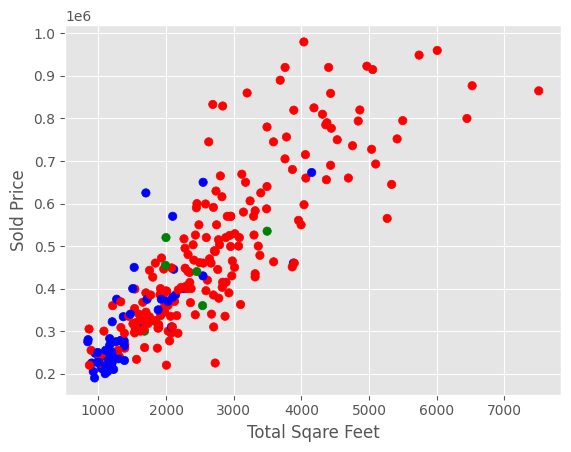

In [22]:
#Make a scatterplot of TotSqf vs. SoldPrice where the house types are colored differently to illustrate your explanation
sold_sqf_prop = realEstate.filter(items=['TotSqf', 'PropType', 'SoldPrice'])
colors = {'Single Family':'red', 'Townhouse': 'green', 'Condo':'blue'}
sold_sqf_prop_plt = plt.scatter(x=sold_sqf_prop['TotSqf'], y=sold_sqf_prop['SoldPrice'], c=sold_sqf_prop['PropType'].map(colors))

plt.xlabel("Total Sqare Feet")
plt.ylabel("Sold Price")
